<a href="https://colab.research.google.com/github/TruongTrungQuan20146404/Truong_Trung_Quan_20146404/blob/main/BTVN_Logic_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=611a1056d918f1dac622421f434f6196abe27cb0e92f577ae5360b52e8fc2e7f
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


6.142010716012545


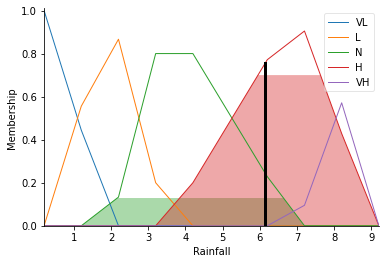

In [ ]:
#Lượng mưa 


import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl



Wind_speed = ctrl.Antecedent(np.arange(0.7,3.12,1),'Wind_speed')
Temperature = ctrl.Antecedent(np.arange(20.4,41.3,1),'Temperature')
Rainfall  = ctrl.Consequent(np.arange(0.2,9.3,1),'Rainfall')

Wind_speed ['VL'] = fuzz.trimf(Wind_speed.universe,[0.7,0.7,2])
Wind_speed ['L'] = fuzz.trimf(Wind_speed.universe,[0.7,2,3])
Wind_speed ['N'] = fuzz.trimf(Wind_speed.universe,[2,3,3.05])
Wind_speed ['H'] = fuzz.trimf(Wind_speed.universe,[3,3.05,3.1])
Wind_speed ['VH'] = fuzz.trimf(Wind_speed.universe,[3.05,3.1,3.1])

Temperature ['VL'] = fuzz.trimf(Temperature.universe,[20.4,20.4,24])
Temperature ['L'] = fuzz.trimf(Temperature.universe,[20.4,24,27.3])
Temperature ['N'] = fuzz.trimf(Temperature.universe,[24,27.3,35])
Temperature ['H'] = fuzz.trimf(Temperature.universe,[27.3,35,41.2])
Temperature ['VH'] = fuzz.trimf(Temperature.universe,[35,41.2,41.2])

Rainfall ['VL'] = fuzz.trimf(Rainfall.universe,[0.2,0.2,2])
Rainfall ['L'] = fuzz.trimf(Rainfall.universe,[0.2,2,3.5])
Rainfall ['N']= fuzz.trimf(Rainfall.universe,[2,3.5,7])
Rainfall ['H'] = fuzz.trimf(Rainfall.universe,[3.5,7,9.1])
Rainfall ['VH']= fuzz.trimf(Rainfall.universe,[7,9.1,9.1])


rule1 = ctrl.Rule(Wind_speed ['VL']&Temperature['VL'],Rainfall['VL'])
rule2 = ctrl.Rule(Wind_speed ['L']&Temperature['VL'],Rainfall['VL'])
rule3 = ctrl.Rule(Wind_speed ['N']&Temperature['VL'],Rainfall['L'])
rule4 = ctrl.Rule(Wind_speed ['H']&Temperature['VL'],Rainfall['L'])
rule5 = ctrl.Rule(Wind_speed ['VH']&Temperature['VL'],Rainfall['N'])
rule6 = ctrl.Rule(Wind_speed ['VL']&Temperature['L'],Rainfall['VL'])
rule7 = ctrl.Rule(Wind_speed ['L']&Temperature['L'],Rainfall['VL'])
rule8 = ctrl.Rule(Wind_speed ['N']&Temperature['L'],Rainfall['L'])
rule9 = ctrl.Rule(Wind_speed ['H']&Temperature['L'],Rainfall['N'])
rule10 = ctrl.Rule(Wind_speed ['VH']&Temperature['L'],Rainfall['H'])
rule11 = ctrl.Rule(Wind_speed ['VL']&Temperature['N'],Rainfall['L'])
rule12 = ctrl.Rule(Wind_speed ['L']&Temperature['N'],Rainfall['L'])
rule13 = ctrl.Rule(Wind_speed ['N']&Temperature['N'],Rainfall['N'])
rule14 = ctrl.Rule(Wind_speed ['H']&Temperature['N'],Rainfall['H'])
rule15 = ctrl.Rule(Wind_speed ['VH']&Temperature['N'],Rainfall['H'])
rule16 = ctrl.Rule(Wind_speed ['VL']&Temperature['H'],Rainfall['L'])
rule17 = ctrl.Rule(Wind_speed ['L']&Temperature['H'],Rainfall['N'])
rule18 = ctrl.Rule(Wind_speed ['N']&Temperature['H'],Rainfall['H'])
rule19 = ctrl.Rule(Wind_speed ['H']&Temperature['H'],Rainfall['H'])
rule20 = ctrl.Rule(Wind_speed ['VH']&Temperature['H'],Rainfall['VH'])
rule21 = ctrl.Rule(Wind_speed ['VL']&Temperature['VH'],Rainfall['N'])
rule22 = ctrl.Rule(Wind_speed ['L']&Temperature['VH'],Rainfall['H'])
rule23 = ctrl.Rule(Wind_speed ['N']&Temperature['VH'],Rainfall['H'])
rule24 = ctrl.Rule(Wind_speed ['H']&Temperature['VH'],Rainfall['VH'])
rule25 = ctrl.Rule(Wind_speed ['VH']&Temperature['VH'],Rainfall['VH'])

Rainfalling_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
Rainfalling = ctrl.ControlSystemSimulation(Rainfalling_ctrl)
Rainfalling.input['Wind_speed'] =3.1
Rainfalling.input['Temperature'] =41.2
Rainfalling.compute()
print(Rainfalling.output['Rainfall'])
Rainfall.view(sim = Rainfalling)

70.0


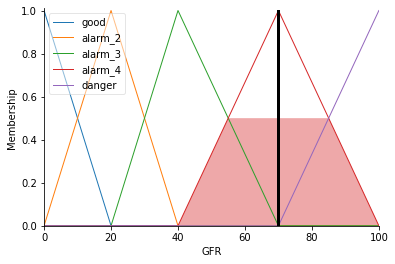

In [ ]:
#Logic fuzzy cho đánh giá chức năng thận ở bệnh nhân sau ghép tạng

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl



Cyclosporine = ctrl.Antecedent(np.arange(0,22,1),'Cyclosporine')
Glycaemia = ctrl.Antecedent(np.arange(70,127,10),'Glycaemia')
GFR  = ctrl.Consequent(np.arange(0,101,10),'GFR')

Cyclosporine ['alarm_down'] = fuzz.trimf(Cyclosporine.universe,[0,0,4])
Cyclosporine ['good'] = fuzz.trimf(Cyclosporine.universe,[0,4,6])
Cyclosporine ['suff'] = fuzz.trimf(Cyclosporine.universe,[4,6,13])
Cyclosporine ['alarm_up'] = fuzz.trimf(Cyclosporine.universe,[6,13,17])
Cyclosporine ['danger'] = fuzz.trimf(Cyclosporine.universe,[17,20,20])

Glycaemia ['good'] = fuzz.trimf(Glycaemia.universe,[70,70,100])
Glycaemia ['alarm'] = fuzz.trimf(Glycaemia.universe,[70,100,125])
Glycaemia ['danger'] = fuzz.trimf(Glycaemia.universe,[100,125,125])


GFR ['good'] = fuzz.trimf(GFR.universe,[0,0,20])
GFR ['alarm_2'] = fuzz.trimf(GFR.universe,[0,20,40])
GFR ['alarm_3']= fuzz.trimf(GFR.universe,[20,40,70])
GFR ['alarm_4'] = fuzz.trimf(GFR.universe,[40,70,100])
GFR ['danger']= fuzz.trimf(GFR.universe,[70,100,100])


rule1 = ctrl.Rule(Cyclosporine ['alarm_down']&Glycaemia['good'],GFR['good'])
rule2 = ctrl.Rule(Cyclosporine ['good']&Glycaemia['good'],GFR['good'])
rule3 = ctrl.Rule(Cyclosporine ['suff']&Glycaemia['good'],GFR['alarm_2'])
rule4 = ctrl.Rule(Cyclosporine ['alarm_up']&Glycaemia['good'],GFR['alarm_2'])
rule5 = ctrl.Rule(Cyclosporine ['danger']&Glycaemia['good'],GFR['alarm_3'])
rule6 = ctrl.Rule(Cyclosporine ['alarm_down']&Glycaemia['alarm'],GFR['good'])
rule7 = ctrl.Rule(Cyclosporine ['good']&Glycaemia['alarm'],GFR['alarm_2'])
rule8 = ctrl.Rule(Cyclosporine ['suff']&Glycaemia['alarm'],GFR['alarm_2'])
rule9 = ctrl.Rule(Cyclosporine ['alarm_up']&Glycaemia['alarm'],GFR['alarm_4'])
rule10 = ctrl.Rule(Cyclosporine ['danger']&Glycaemia['alarm'],GFR['alarm_4'])
rule11 = ctrl.Rule(Cyclosporine ['alarm_down']&Glycaemia['danger'],GFR['alarm_2'])
rule12 = ctrl.Rule(Cyclosporine ['good']&Glycaemia['danger'],GFR['alarm_3'])
rule13 = ctrl.Rule(Cyclosporine ['suff']&Glycaemia['danger'],GFR['alarm_3'])
rule14 = ctrl.Rule(Cyclosporine ['alarm_up']&Glycaemia['danger'],GFR['alarm_4'])
rule15 = ctrl.Rule(Cyclosporine ['danger']&Glycaemia['danger'],GFR['danger'])


GFRing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
GFRing = ctrl.ControlSystemSimulation(GFRing_ctrl)
GFRing.input['Cyclosporine'] = 15
GFRing.input['Glycaemia'] = 125
GFRing.compute()
print(GFRing.output['GFR'])
GFR.view(sim = GFRing)

13.463414634146341


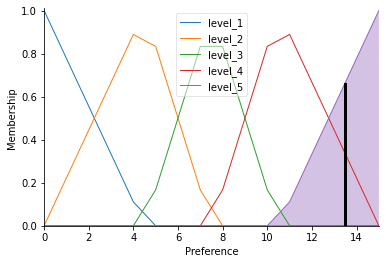

In [6]:
#Công cụ đề xuất thực phẩm

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl



Budget = ctrl.Antecedent(np.arange(0,10.1,1),'Budget')
Taste = ctrl.Antecedent(np.arange(0,9.1,1),'Taste')
Preference  = ctrl.Consequent(np.arange(0,15.1,1),'Preference')

Budget ['less'] = fuzz.trimf(Budget.universe,[0,0,5])
Budget ['medium'] = fuzz.trimf(Budget.universe,[0,5,10])
Budget ['high'] = fuzz.trimf(Budget.universe,[5,10,10])


Taste ['Less_Preferred'] = fuzz.trimf(Taste.universe,[0,0,4.5])
Taste ['Preferred'] = fuzz.trimf(Taste.universe,[0,4.5,9])
Taste ['More_Preferred'] = fuzz.trimf(Taste.universe,[4.5,9,9])


Preference ['level_1'] = fuzz.trimf(Preference.universe,[0,0,4.5])
Preference ['level_2'] = fuzz.trimf(Preference.universe,[0,4.5,7.5])
Preference ['level_3']= fuzz.trimf(Preference.universe,[4.5,7.5,10.5])
Preference ['level_4'] = fuzz.trimf(Preference.universe,[7.5,10.5,15])
Preference ['level_5']= fuzz.trimf(Preference.universe,[10.5,15,15])


rule1 = ctrl.Rule(Budget ['less']&Taste['Less_Preferred'],Preference['level_1'])
rule2 = ctrl.Rule(Budget ['less']&Taste['Preferred'],Preference['level_2'])
rule3 = ctrl.Rule(Budget ['less']&Taste['More_Preferred'],Preference['level_3'])
rule4 = ctrl.Rule(Budget ['medium']&Taste['Less_Preferred'],Preference['level_2'])
rule5 = ctrl.Rule(Budget ['medium']&Taste['Preferred'],Preference['level_3'])
rule6 = ctrl.Rule(Budget ['medium']&Taste['More_Preferred'],Preference['level_4'])
rule7 = ctrl.Rule(Budget ['high']&Taste['Less_Preferred'],Preference['level_3'])
rule8 = ctrl.Rule(Budget ['high']&Taste['Preferred'],Preference['level_4'])
rule9 = ctrl.Rule(Budget ['high']&Taste['More_Preferred'],Preference['level_5'])


Preferenceing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
Preferenceing = ctrl.ControlSystemSimulation(Preferenceing_ctrl)
Preferenceing.input['Budget'] = 10
Preferenceing.input['Taste'] = 9
Preferenceing.compute()
print(Preferenceing.output['Preference'])
Preference.view(sim = Preferenceing)